In [1]:
import pandas as pd
import numpy as np
import random
# read data
df = pd.read_excel(open('results/tag0_02-14-1_dataByMinute.xlsx','rb')) 
points = []
for i in range(1, len(df['hour'])):
    point = [df['x值'][i],df['y值'][i]]
    points.append(point)

points_array = np.array(points)

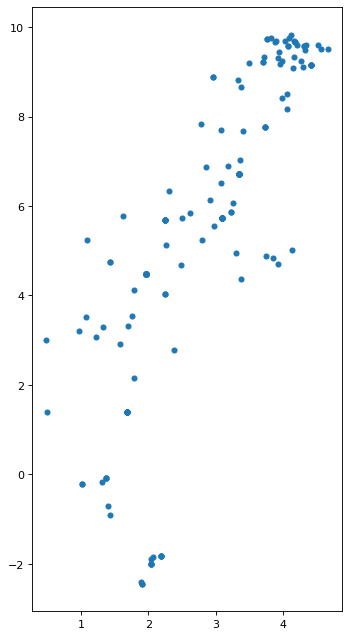

In [2]:
import sklearn
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 10), dpi=80)
plt.scatter(points_array[:,0],points_array[:,1],s=20)

## 方法一 ： K-means

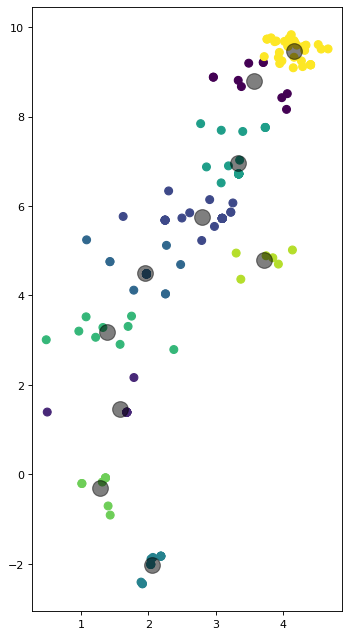

In [16]:
#用k-means算法完成4个簇的识别工作
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(points_array)
y_kmeans = kmeans.predict(points_array)
#用带彩色标签的数据来展示聚类结果
plt.figure(figsize=(5, 10), dpi=80)
plt.scatter(points_array[:,0],points_array[:,1],c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

## 方法二 ： 密度聚类 DBSCAN

密度聚类
密度聚类，即基于密度的聚类(density-based clustering)，此类算法假设聚类结构能通过样本分布的紧密程度确定。前面所讲的原型聚类及层次聚类等都是把距离(欧式距离，闵科夫斯基距离，曼哈顿距离等)作为两个样本或者两个簇之间相似度的评价指标，因此导致了最终聚类结构大都是球状簇或者凸形集合，对任意形状的聚类簇比较吃力，同时对噪声数据不敏感，而基于密度的聚类算法可以发现任意形状的聚类，且对带有噪音点的数据起着重要的作用。

### 分类器一 ： sklearn

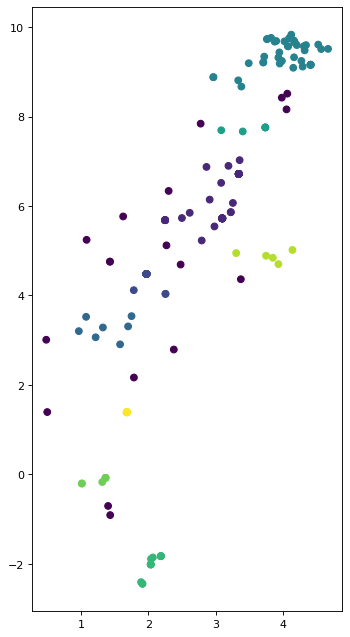

In [4]:
from sklearn.cluster import DBSCAN
#eps为距离阈值ϵ，min_samples为邻域样本数阈值MinPts,points为数据
#eps和min_samples 需要进行调参
y_pred = DBSCAN(eps = 0.5, min_samples = 5).fit_predict(points_array)

# 分类结果
plt.figure(figsize=(5, 10), dpi=80)
plt.scatter(points_array[:, 0], points_array[:, 1], c=y_pred)
plt.show()

### 分类器二 ： python

In [5]:
# Python
#计算两个向量之间的欧式距离
def calDist(X1 , X2 ):
    sum = 0
    for x1 , x2 in zip(X1 , X2):
        sum += (x1 - x2) ** 2
    return sum ** 0.5

In [6]:
#获取一个点的ε-邻域（记录的是索引）
def getNeibor(data , dataSet , e):
    res = []
    for i in range(len(dataSet)):
        if calDist(data , dataSet[i])<e:
            res.append(i)
    return res

In [7]:
#密度聚类算法
def DBSCAN(dataSet , e , minPts):
    coreObjs = {}#初始化核心对象集合
    C = {}
    n = len(dataSet)
    #找出所有核心对象，key是核心对象的index，value是ε-邻域中对象的index
    for i in range(n):
        neibor = getNeibor(dataSet[i] , dataSet , e)
        if len(neibor)>=minPts:
            coreObjs[i] = neibor
    oldCoreObjs = coreObjs.copy()
    k = 0#初始化聚类簇数
    notAccess = list(range(n))#初始化未访问样本集合（索引）
    while len(coreObjs)>0:
        OldNotAccess = []
        OldNotAccess.extend(notAccess)
        cores = coreObjs.keys()
        #随机选取一个核心对象
        randNum = random.randint(0,len(cores)-1)
        cores=list(cores)
        core = cores[randNum]
        queue = []
        queue.append(core)
        notAccess.remove(core)
        while len(queue)>0:
            q = queue[0]
            del queue[0]
            if q in oldCoreObjs.keys() :
                delte = [val for val in oldCoreObjs[q] if val in notAccess]#Δ = N(q)∩Γ
                queue.extend(delte)#将Δ中的样本加入队列Q
                notAccess = [val for val in notAccess if val not in delte]#Γ = Γ\Δ
        k += 1
        C[k] = [val for val in OldNotAccess if val not in notAccess]
        for x in C[k]:
            if x in coreObjs.keys():
                del coreObjs[x]
    return C



In [13]:
def draw(C , dataSet):
    plt.figure(figsize=(5, 10), dpi=80)
    color = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in C.keys():
        X = []
        Y = []
        datas = C[i]
        for j in range(len(datas)):
            X.append(dataSet[datas[j]][0])
            Y.append(dataSet[datas[j]][1])
        plt.scatter(X, Y, marker='o', color=color[i % len(color)], label=i)
    plt.legend(loc='upper right')
    plt.show()

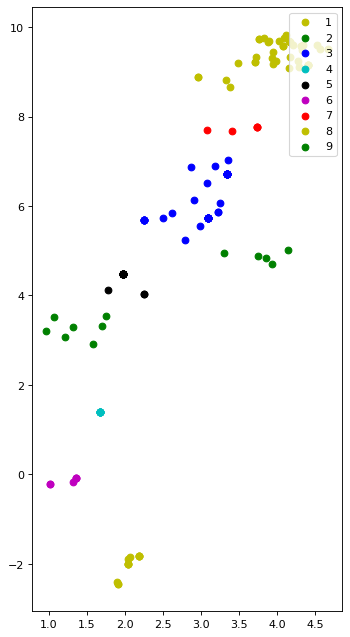

In [14]:

C = DBSCAN(points, 0.5, 5)
draw(C,points)

## 方法三 ： OPTICS

/home/tianchi/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_optics.py:904: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


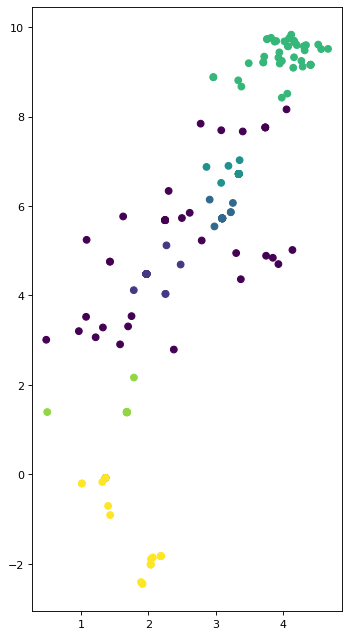

In [15]:
from sklearn.cluster import OPTICS

clust = OPTICS(min_samples=10, xi=0.05, eps=0.5 , min_cluster_size=2).fit_predict(points_array)

# labels = clust.labels_[clust.ordering_]

# 分类结果
plt.figure(figsize=(5, 10), dpi=80)
plt.scatter(points_array[:, 0], points_array[:, 1], c=clust)
plt.show()